<a href="https://colab.research.google.com/github/jafetimbre/optimus/blob/master/src/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Laboratorul 6

## Distributii

In [15]:
tips_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/optimus/master/data/tips.csv')
tips_data

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


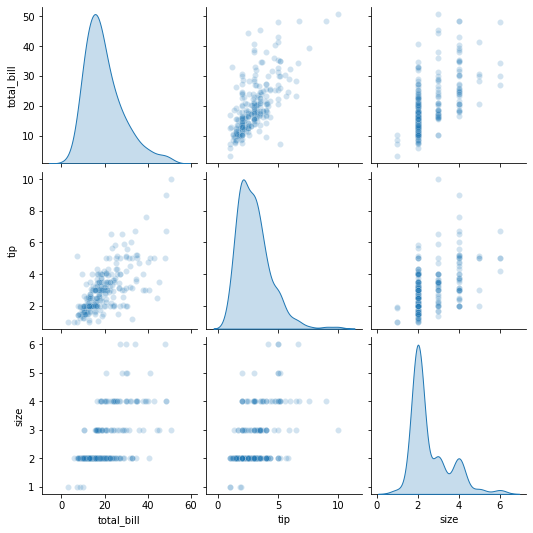

In [20]:
data = tips_data[['total_bill', 'tip', 'size']]
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.2})

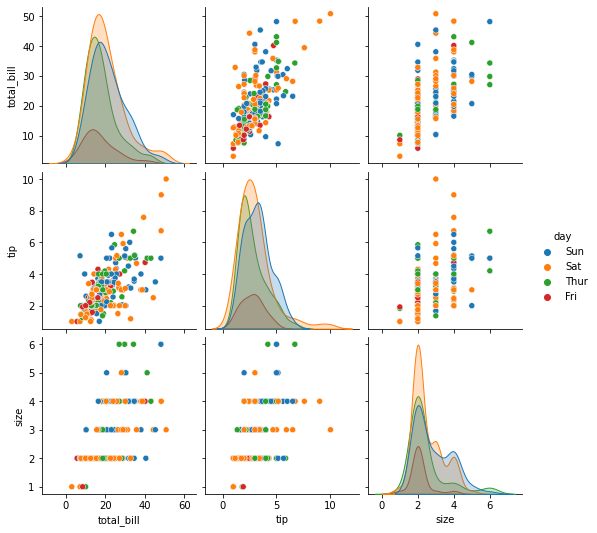

In [30]:
data = tips_data[['total_bill', 'tip', 'size', 'day']]
sns.pairplot(data, hue='day')

In [61]:
births = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/optimus/master/data/births.csv')
births.dropna(inplace=True)

# months_str = [ m[:3] for m in [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] ]
# births.month = births.month.apply(lambda x: months_str[x-1])

births = births[births.day <= 31]

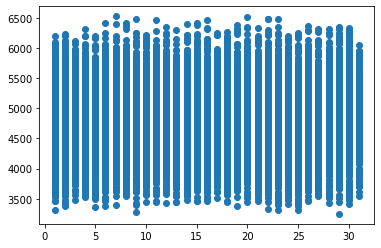

In [79]:
plt.scatter(births['day'], births['births'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


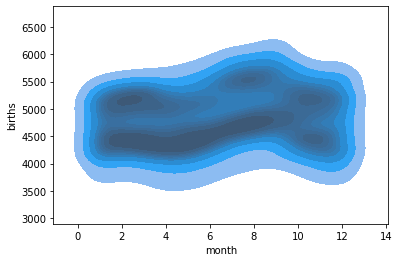

In [77]:
# sns.pairplot(births[['births', 'day']], hue='day')
sns.kdeplot(births['month'], births['births'], shade=True)


In [59]:
births.head()

,year,month,day,gender,births
0,1969,Jan,1.0,F,4046
1,1969,Jan,1.0,M,4440
2,1969,Jan,2.0,F,4454
3,1969,Jan,2.0,M,4548
4,1969,Jan,3.0,F,4548


In [73]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
days = [ day[:3] for day in days ]

births['datetime'] = pd.to_datetime(births[['year', 'month', 'day']], errors='coerce')
births.dropna(inplace=True)

births['weekday'] = [ days[i.weekday()] for i in births['datetime'] ]

births.head()

,year,month,day,gender,births,datetime,weekday
0,1969,1,1.0,F,4046,1969-01-01,Wed
1,1969,1,1.0,M,4440,1969-01-01,Wed
2,1969,1,2.0,F,4454,1969-01-02,Thu
3,1969,1,2.0,M,4548,1969-01-02,Thu
4,1969,1,3.0,F,4548,1969-01-03,Fri


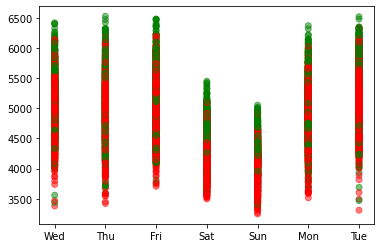

In [88]:
colors = [ 'green' if p == 'M' else 'red' for p in births['gender'] ]
plt.scatter(births['weekday'], births['births'], c=colors, alpha=0.5)

In [89]:
births.year.unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988])

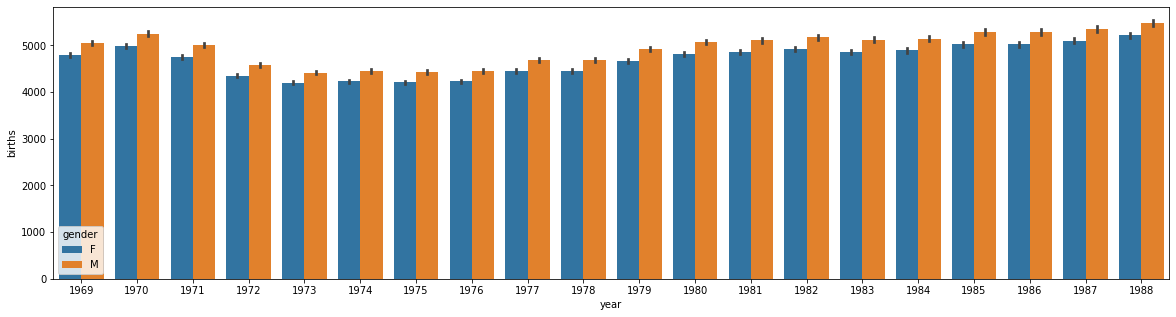

In [122]:
plt.figure(figsize=(20, 5))
sns.barplot(x="year", hue="gender", y="births", data=births)

In [124]:
tips_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/optimus/master/data/tips.csv')
tips_data.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


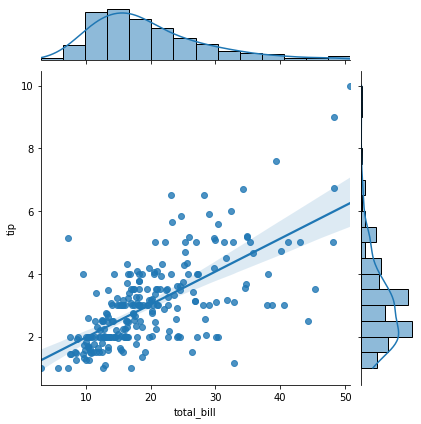

In [ ]:
sns.jointplot("total_bill", "tip", data=tips_data, kind='reg')

Repetați analiza prin separarea datelor pe zile

In [ ]:
tips_days = { x: pd.DataFrame(y) for x, y in tips_data.groupby('day', as_index=False) }
ans['Sun']

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
186,20.90,3.50,Yes,Sun,Dinner,3
187,30.46,2.00,Yes,Sun,Dinner,5
188,18.15,3.50,Yes,Sun,Dinner,3
189,23.10,4.00,Yes,Sun,Dinner,3


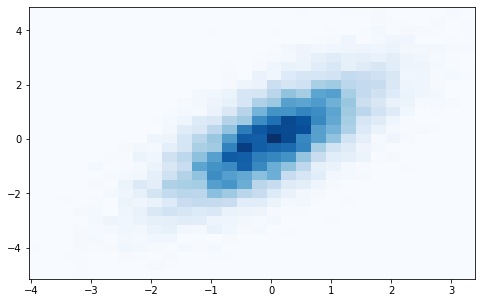

In [12]:
# mean = [0, 0]
# cov = [[1, 1], [1, 2]] #[[1, 0], [0, 2]]
# x, y = np.random.multivariate_normal(mean, cov, 10000).T
fig, ax = plt.subplots(figsize=(8,5))
ax.hist2d(x, y, bins=30, cmap='Blues')
plt.show()